In [1]:
# -*- coding: utf-8 -*-

# CNN(합성곱신경망)

# 사전준비

In [2]:
# 깔끔한 그래프 출력을 위해
%matplotlib inline
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 라이브러리 불러오기

In [3]:
import tensorflow as tf
#from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import os

print(tf.__version__)
#print(keras.__version__)

2.4.1


## 하이퍼 파라미터 설정

In [4]:
learning_rate = 0.001
training_epochs = 2
batch_size = 100
n_class = 10

## MNIST 또는 패션 MNIST 데이터 선택

In [5]:
# ## MNIST Dataset 
# mnist = tf.keras.datasets.mnist
# class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


# Fashion MNIST Dataset 
mnist = tf.keras.datasets.fashion_mnist
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Datasets

In [6]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()  

In [7]:
N_TRAIN = train_images.shape[0]
N_TEST = test_images.shape[0]

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
# pixel값을 0~1사이 범위로 조정
train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.

# CNN에 입력으로 넣기 위해 3차원->4차원으로 변경(channel에 1을 추가)
train_images = train_images[..., tf.newaxis]
test_images = test_images[..., tf.newaxis]

# label을 onehot-encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [11]:
train_images.shape

(60000, 28, 28, 1)

In [12]:
test_labels[:3]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

# 순차형 API (Sequential API)

## 모델 구축

In [13]:
#model.summary()

## 연습 1: CNN 기본 모델 만들기

In [14]:
# 순차형 API를 사용해 위의 모델을 구축하라.
# 힌트:
# Conv2D -> MaxPool2D를 세번 반복하고, Flatten -> Dense -> Dropout -> Dense로 완성하라. 
# kersnel_size는 3, activation='relu', padding='SAMME', filter는 32, 64, 128 사용하고, Dense에서는 출력 유닛을 256, 10을 사용하라.

def create_model():
###########################################
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='SAME', 
                                  input_shape=(28, 28, 1)))
    model.add(tf.keras.layers.MaxPool2D(padding='SAME'))
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='SAME'))
    model.add(tf.keras.layers.MaxPool2D(padding='SAME'))
    model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='SAME'))
    model.add(tf.keras.layers.MaxPool2D(padding='SAME'))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.4))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
#################################################
    return model

In [82]:
# 막 해보는 
def create_model():
###########################################
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(filters=100, kernel_size=(3,3), activation='relu', padding='SAME', 
                                  input_shape=(200, 300, 3)))
    model.add(tf.keras.layers.Conv2D(filters=200, kernel_size=(3,3), activation='relu', padding='SAME'))
    model.add(tf.keras.layers.Conv2D(filters=400, kernel_size=(3,3), activation='relu', padding='SAME'))
    
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
#################################################
    return model

In [83]:
model = create_model()
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 200, 300, 100)     2800      
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 200, 300, 200)     180200    
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 200, 300, 400)     720400    
_________________________________________________________________
dense_14 (Dense)             (None, 200, 300, 10)      4010      
Total params: 907,410
Trainable params: 907,410
Non-trainable params: 0
_________________________________________________________________


## 연습 2 모델 컴파일

In [16]:
## 모델 컴파일
# Adam, cross endtropy와 accuracy를 사용해 완성하라.
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), 
                 loss='categorical_crossentropy',  # sparse_crossentropy 정수형 
                 metrics=['accuracy']            
                )

# 연습3: 학습

In [17]:
## 학습
# 힌트 훈련셋, 에폭, 배치크기, 검증셋을 지정하라.
model.fit(train_images, train_labels, epochs=training_epochs, batch_size=batch_size, validation_data=(test_images, test_labels))

Epoch 1/2
600/600 [==============================] - 25s 42ms/step - loss: 0.7537 - accuracy: 0.7247 - val_loss: 0.3452 - val_accuracy: 0.8758
Epoch 2/2
600/600 [==============================] - 24s 39ms/step - loss: 0.3302 - accuracy: 0.8832 - val_loss: 0.2866 - val_accuracy: 0.8923


# tf.data.Dataset로 데이터셋 만들기

## 연습 4: 데이터셋 만들기

In [18]:
## dataset 만들기
# tf.data.Dataset의 from_tensor_slices를 이용해서 다음 데이터셋을 만들어보라
train_dataset=tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(buffer_size=100000).batch(batch_size).repeat()
test_dataset =tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(batch_size) 

In [19]:
steps_per_epoch =N_TRAIN//batch_size  #model.fit()에서 사용한다.
validation_steps = N_TEST//batch_size

In [20]:
## 다시 모델 생성
model = create_model()

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)             

## 연습 5 모델 컴파일

In [22]:
## 모델 컴파일
# Adam, cross endtropy와 accuracy를 사용해 완성하라.
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), 
                 loss='categorical_crossentropy', 
                 metrics=['accuracy']            
                )

## 연습 6: 학습 전 결과 확인하라.

In [23]:
## 학습 전에 결과 확인 다음을 완성하라.
model.evaluate(test_dataset, steps=validation_steps)

100/100 [==============================] - 1s 10ms/step - loss: 2.3044 - accuracy: 0.1006


[2.3051271438598633, 0.10040000081062317]

In [24]:
steps_per_epoch = N_TRAIN//batch_size
validation_steps = N_TEST//batch_size
print('number of steps per epoch: ', steps_per_epoch)
print('number of steps per validation: ', validation_steps)

number of steps per epoch:  600
number of steps per validation:  100


## 연습 7: 모델 적합화

In [25]:
## 학습을 tf.data.Dataset으로 생성한 데이터셋을 이용해서 적합화를 시도하라.
history= model.fit(train_dataset, epochs=training_epochs, steps_per_epoch=steps_per_epoch, 
          validation_data=test_dataset, validation_steps=validation_steps)

# model.fit(train_images, train_labels, epochs=training_epochs, batch_size=batch_size, validation_data=(test_images, test_labels))

Epoch 1/2
600/600 [==============================] - 29s 48ms/step - loss: 0.5204 - accuracy: 0.8113 - val_loss: 0.3419 - val_accuracy: 0.8745
Epoch 2/2
600/600 [==============================] - 28s 47ms/step - loss: 0.3156 - accuracy: 0.8853 - val_loss: 0.2966 - val_accuracy: 0.8884


In [26]:
## 학습 후에 결과 확인 
model.evaluate(test_dataset, steps=validation_steps)

100/100 [==============================] - 1s 10ms/step - loss: 0.2966 - accuracy: 0.8884


[0.2966170608997345, 0.8884000182151794]

In [27]:
## 결과 확인
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img[:,:,0],cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    #plt.xticks([])
    plt.xticks(range(n_class), class_names, rotation=90)
    plt.yticks([])
    thisplot = plt.bar(range(n_class), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

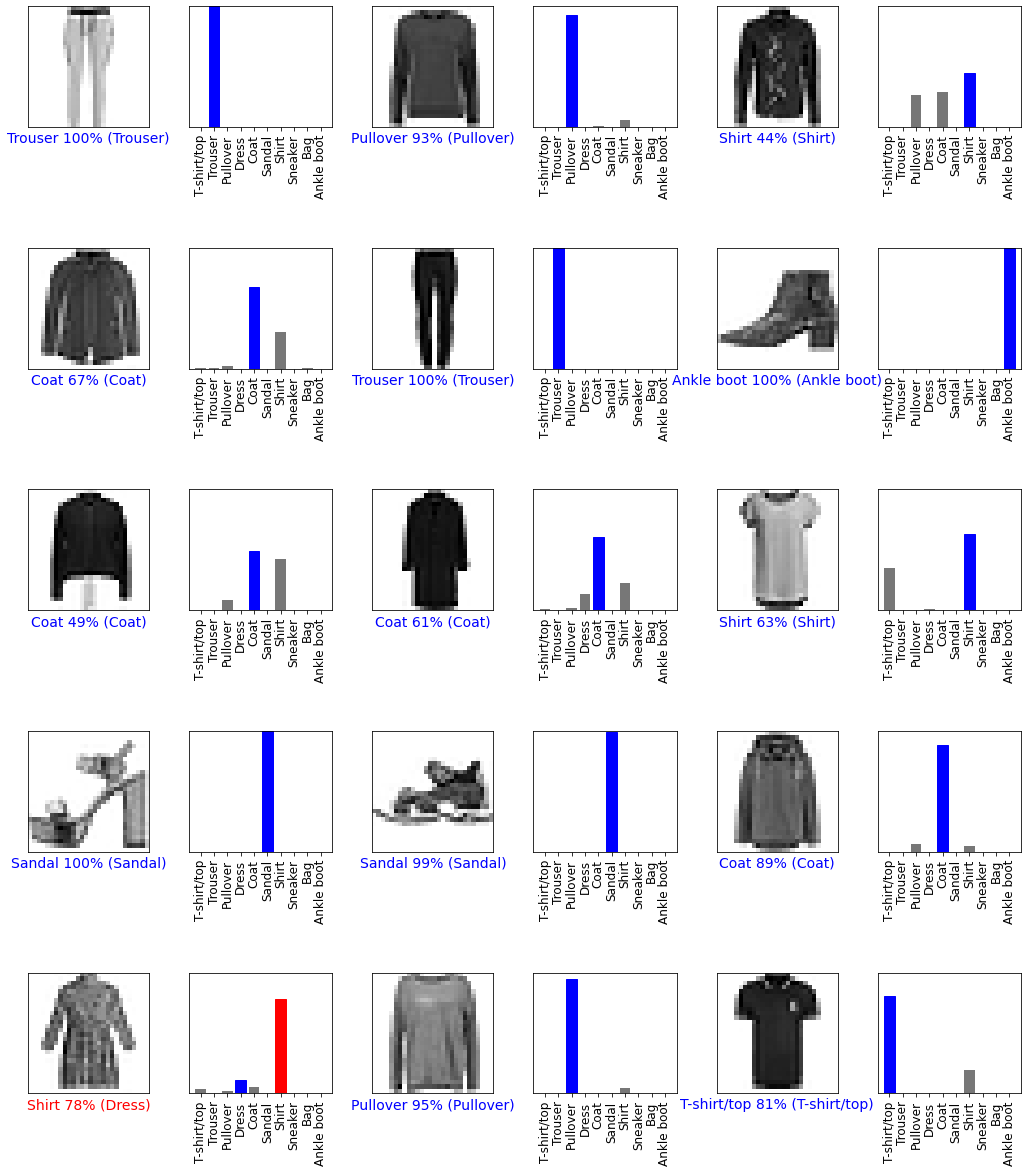

In [28]:
rnd_idx = np.random.randint(1, N_TEST//batch_size)
img_cnt = 0
for images, labels in test_dataset:
    img_cnt += 1
    if img_cnt != rnd_idx:
        continue
    predictions = model(images, training=False)
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    labels = tf.argmax(labels, axis=-1)
    plt.figure(figsize=(3*2*num_cols, 4*num_rows))
    plt.subplots_adjust(hspace=1.0)
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions.numpy(), labels.numpy())        
    break

# 체크포인트 디레토리와 경로 작성 

In [29]:
cur_dir = os.getcwd()
ckpt_dir_name = 'checkpoints'
model_dir_name = 'mnist_cnn_keras'
ckpt_name = 'mnist_cnn_keras.ckpt'

checkpoint_dir = os.path.join(cur_dir, ckpt_dir_name, model_dir_name)
os.makedirs(checkpoint_dir, exist_ok=True)

checkpoint_path = os.path.join(checkpoint_dir, ckpt_name)

In [30]:
checkpoint_path

'C:\\Users\\choyj\\Desktop\\AIEngineer\\AIEngineer\\2일차 기초실습\\checkpoints\\mnist_cnn_keras\\mnist_cnn_keras.ckpt'

# 가중치 저장

# 연습 8: 가중치 저장

In [31]:
model.save_weights(checkpoint_path)

In [32]:
!ls 'checkpoints/mnist_cnn_keras'

'ls'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


# 다시 모델 작성

In [33]:
new_model1 = create_model()
new_model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
new_model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)             

# 복원 이전 정확도 테스트

In [34]:
new_model1.evaluate(test_dataset)

100/100 [==============================] - 1s 11ms/step - loss: 2.3008 - accuracy: 0.1030 0s - loss: 2.3008 - accuracy: 0.10


[2.300081253051758, 0.10400000214576721]

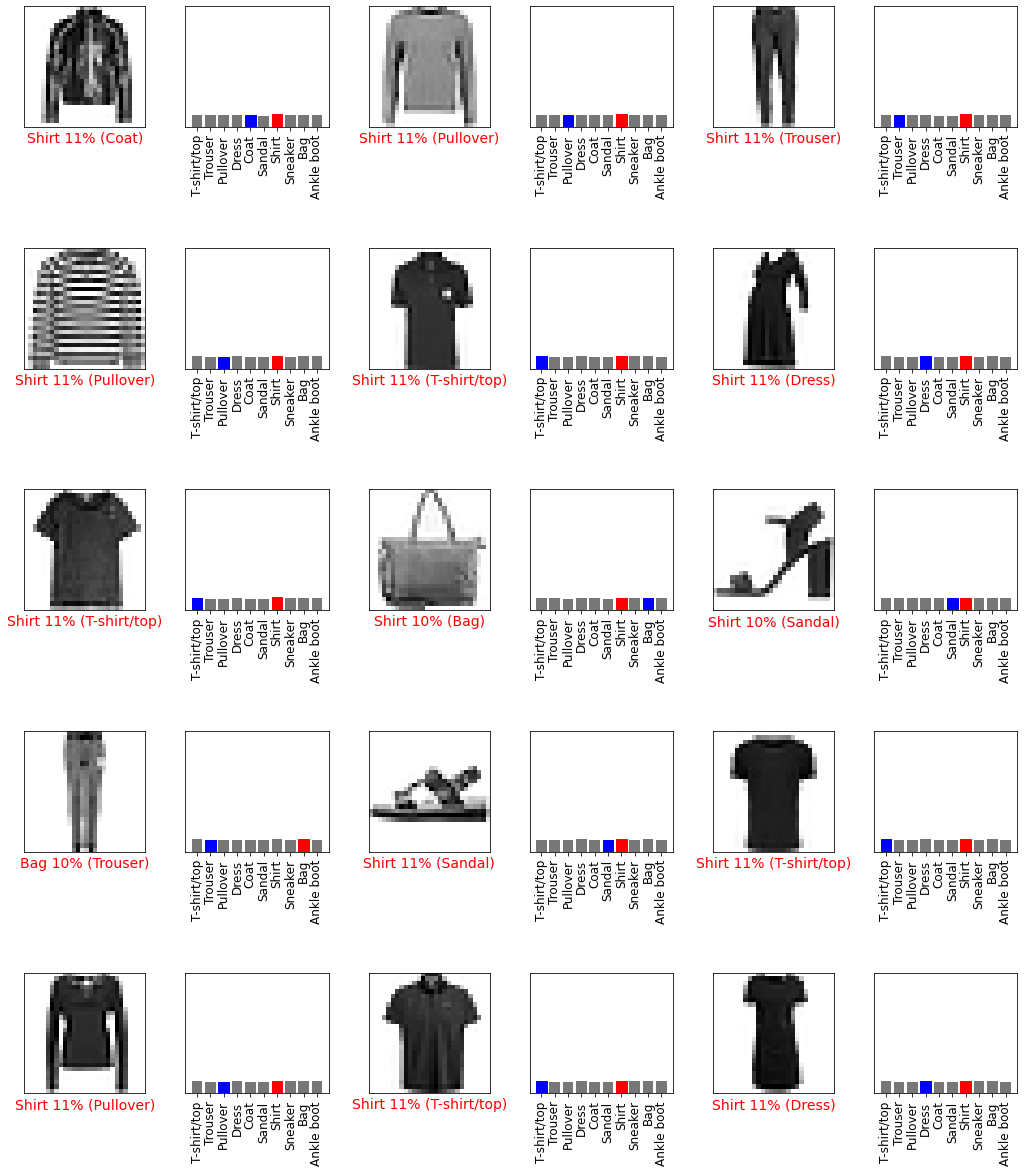

In [35]:
rnd_idx = np.random.randint(1, N_TEST//batch_size)
img_cnt = 0
for images, labels in test_dataset:
    img_cnt += 1
    if img_cnt != rnd_idx:
        continue
    predictions = new_model1(images, training=False)
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    labels = tf.argmax(labels, axis=-1)
    plt.figure(figsize=(3*2*num_cols, 4*num_rows))
    plt.subplots_adjust(hspace=1.0)
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions.numpy(), labels.numpy())        
    break

# 가중치 복원

## 연습 9 가중치를 복원하라.

In [36]:
new_model1.load_weights(checkpoint_path)

In [37]:
# 복원 후 정확도 테스트

In [38]:
new_model1.evaluate(test_dataset)

100/100 [==============================] - 1s 11ms/step - loss: 0.2966 - accuracy: 0.8884


[0.2966170608997345, 0.8884000182151794]

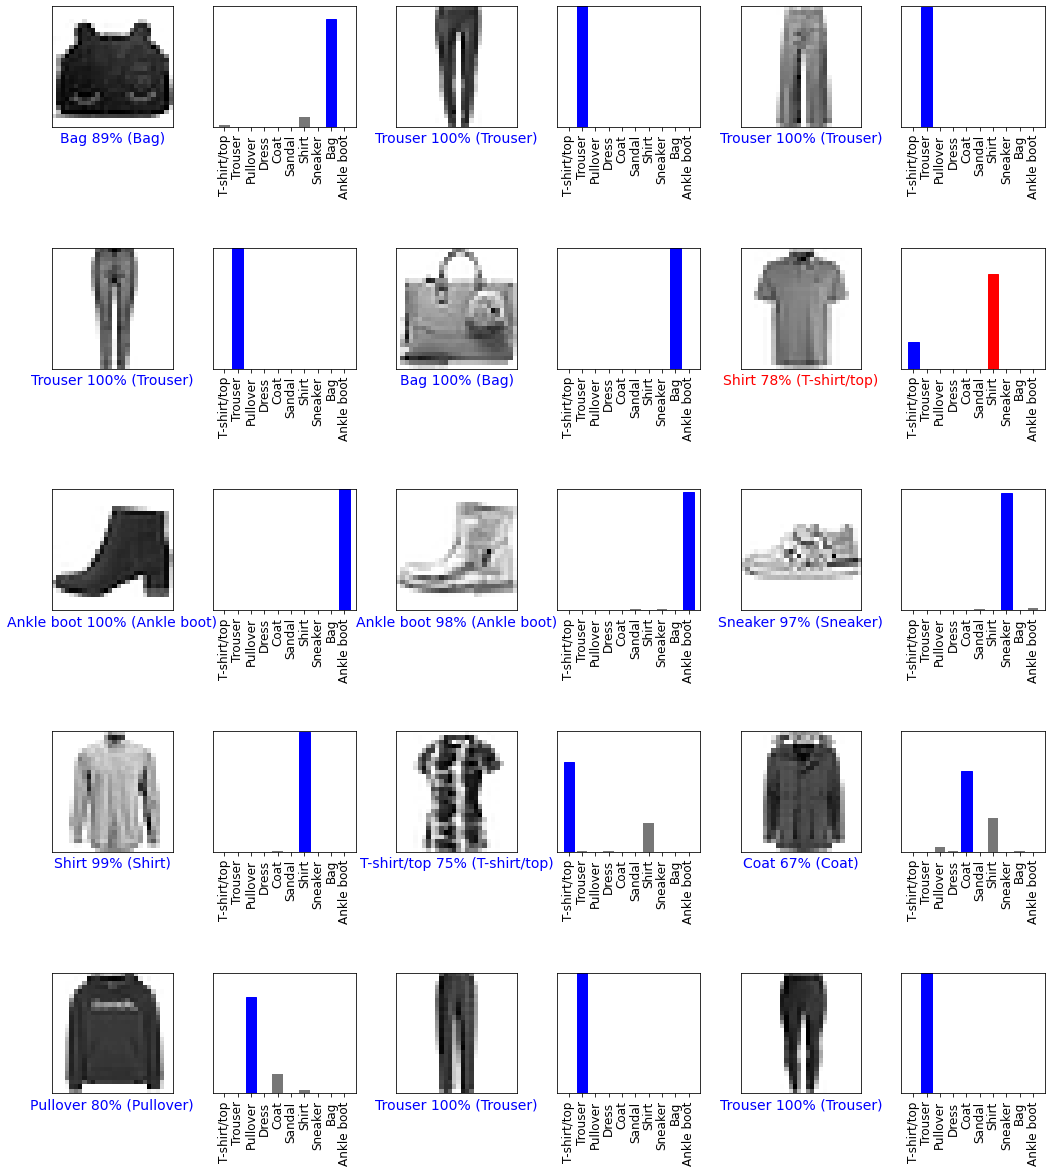

In [39]:
rnd_idx = np.random.randint(1, N_TEST//batch_size)
img_cnt = 0
for images, labels in test_dataset:
    img_cnt += 1
    if img_cnt != rnd_idx:
        continue
    predictions = new_model1(images, training=False)
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    labels = tf.argmax(labels, axis=-1)
    plt.figure(figsize=(3*2*num_cols, 4*num_rows))
    plt.subplots_adjust(hspace=1.0)
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions.numpy(), labels.numpy())        
    break

# Callback 사용하여 저장하기

In [40]:
## 새로운 model 생성
model = create_model()

## model compile
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2048)             

In [41]:
## 학습 전에 결과 확인
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 2.3098 - accuracy: 0.0969


[2.31115984916687, 0.10000000149011612]

In [42]:
ckpt_name = 'mnist_cnn_{epoch:04d}.ckpt'
checkpoint_path = os.path.join(checkpoint_dir, ckpt_name)

# callback 만들기
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                              save_weights_only=True)

## Training
history = model.fit(train_dataset, epochs=training_epochs, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps,
                    callbacks=[cp_callback])

Epoch 1/2
600/600 [==============================] - 30s 49ms/step - loss: 0.5079 - accuracy: 0.8152 - val_loss: 0.3471 - val_accuracy: 0.8717
Epoch 2/2
600/600 [==============================] - 30s 50ms/step - loss: 0.3106 - accuracy: 0.8869 - val_loss: 0.2879 - val_accuracy: 0.8948


In [43]:
!ls 'checkpoints/mnist_cnn_keras'

'ls'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [44]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

'C:\\Users\\choyj\\Desktop\\AIEngineer\\AIEngineer\\2일차 기초실습\\checkpoints\\mnist_cnn_keras\\mnist_cnn_0002.ckpt'

In [45]:
# 새로운 모델 인스턴스화 
new_model2 = create_model()
new_model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
# 가중치 로딩 이전
new_model2.evaluate(test_dataset)

# 사전 저장된 가중치 로딩
new_model2.load_weights(latest)

# 모델 재평가
new_model2.evaluate(test_dataset)

100/100 [==============================] - 1s 11ms/step - loss: 0.2879 - accuracy: 0.8948


[0.2879176139831543, 0.8948000073432922]

In [46]:
## 다시 Training
history =new_model2.fit(train_dataset, epochs=training_epochs, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps,
                    callbacks=[cp_callback])

Epoch 1/2
600/600 [==============================] - 32s 51ms/step - loss: 0.2601 - accuracy: 0.9065 - val_loss: 0.2542 - val_accuracy: 0.9061
Epoch 2/2
600/600 [==============================] - 29s 48ms/step - loss: 0.2301 - accuracy: 0.9160 - val_loss: 0.2337 - val_accuracy: 0.9146


In [47]:
## 또 다시 Training
history =new_model2.fit(train_dataset, epochs=training_epochs, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps,
                    callbacks=[cp_callback])

Epoch 1/2
600/600 [==============================] - 30s 49ms/step - loss: 0.2073 - accuracy: 0.9241 - val_loss: 0.2315 - val_accuracy: 0.9164
Epoch 2/2
600/600 [==============================] - 29s 49ms/step - loss: 0.1899 - accuracy: 0.9302 - val_loss: 0.2416 - val_accuracy: 0.9151


In [48]:
new_model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [49]:
## 또 다시 Training
history =new_model2.fit(train_dataset, epochs=training_epochs, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps,
                    callbacks=[cp_callback])

Epoch 1/2
600/600 [==============================] - 29s 48ms/step - loss: 0.1699 - accuracy: 0.9360 - val_loss: 0.2286 - val_accuracy: 0.9196
Epoch 2/2
600/600 [==============================] - 29s 48ms/step - loss: 0.1540 - accuracy: 0.9429 - val_loss: 0.2279 - val_accuracy: 0.9223


# 전체 모델 저장

## HDF5 format으로 전체 model 저장하기

In [50]:
save_dir_name = 'saved_models'
os.makedirs(save_dir_name, exist_ok=True)
hdf5_model_path = os.path.join(cur_dir, save_dir_name, 'my_model.h5')
hdf5_model_path

'C:\\Users\\choyj\\Desktop\\AIEngineer\\AIEngineer\\2일차 기초실습\\saved_models\\my_model.h5'

In [51]:
model.save(hdf5_model_path)

In [52]:
!ls saved_models

'ls'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


## 동일한 모델 재작성

In [53]:
new_model3 = tf.keras.models.load_model(hdf5_model_path)

In [54]:
new_model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2048)             

In [55]:
new_model3.evaluate(test_dataset)

100/100 [==============================] - 1s 10ms/step - loss: 0.2879 - accuracy: 0.8948


[0.2879176139831543, 0.8948000073432922]

## saved_model format으로 저장하기(.pb)

In [56]:
saved_model_path = os.path.join(cur_dir, save_dir_name, 'my_model')

In [57]:
model.save(saved_model_path)

INFO:tensorflow:Assets written to: C:\Users\choyj\Desktop\AIEngineer\AIEngineer\2일차 기초실습\saved_models\my_model\assets


In [58]:
!ls saved_models/my_model

'ls'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


## 동일한 모델 재작성

In [59]:
new_model4 = tf.keras.models.load_model(saved_model_path)

In [60]:
new_model4.evaluate(test_dataset)

100/100 [==============================] - 1s 10ms/step - loss: 0.2879 - accuracy: 0.8948


[0.2879176139831543, 0.8948000073432922]

In [61]:
#############################################################################################################################

# 함수형 API(Fuctional API) 이용하기

In [62]:
# 순차형 (Sequential API)
def create_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='SAME', input_shape=(28,28,1)))
    model.add(tf.keras.layers.MaxPool2D(padding='SAME'))
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='SAME'))
    model.add(tf.keras.layers.MaxPool2D(padding='SAME'))
    model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='SAME'))
    model.add(tf.keras.layers.MaxPool2D(padding='SAME'))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.4))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    return model

## 연습 10 함수형 API를 사용해 모델 구축하라.

In [63]:
# 위의 모델을 함수형 API를 사용하여 다음을 완성하라.
def create_model():
    inputs = tf.keras.Input(shape=(28, 28, 1))
    conv1 =tf.keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', padding='SAME') (inputs)
    pool1 =tf.keras.layers.MaxPool2D(padding='SAME') (conv1)
    conv2 =tf.keras.layers.Conv2D(filters=64, kernel_size=[3,3], activation='relu', padding='SAME') (pool1)
    pool2 =tf.keras.layers.MaxPool2D(padding='SAME') (conv2)
    conv3 =tf.keras.layers.Conv2D(filters=128, kernel_size=[3,3], activation='relu', padding='SAME') (pool2)
    pool3 =tf.keras.layers.MaxPool2D(padding='SAME') (conv3)
    pool3_flat = tf.keras.layers.Flatten()(pool3)
    dense4 =tf.keras.layers.Dense(units=256, activation='relu') (pool3_flat)
    drop4 =tf.keras.layers.Dropout(rate=0.4)(dense4)
    logits =tf.keras.layers.Dense(units=10, activation='softmax')(drop4)
    return tf.keras.Model(inputs=inputs, outputs=logits)


In [64]:
model = create_model()

In [65]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 4, 4, 128)         0     

In [66]:
## 모델 컴파일
# Adam, cross endtropy와 accuracy를 사용해 완성하라.
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [67]:
## 학습전 정확도 확인
model.evaluate(test_dataset)

100/100 [==============================] - 1s 10ms/step - loss: 2.3109 - accuracy: 0.0999


[2.3113532066345215, 0.10209999978542328]

In [68]:
## 학습
# 힌트 훈련셋, 에폭, 배치크기, 검증셋와 훈련과 검증 스텝수를 지정하라.
## 학습을 tf.data.Dataset으로 생성한 데이터셋을 이용해서 적합화를 시도하라.
history= model.fit(train_dataset, epochs=training_epochs, steps_per_epoch=steps_per_epoch, 
          validation_data=test_dataset, validation_steps=validation_steps)

Epoch 1/2
600/600 [==============================] - 29s 48ms/step - loss: 0.5179 - accuracy: 0.8109 - val_loss: 0.3364 - val_accuracy: 0.8785
Epoch 2/2
600/600 [==============================] - 29s 48ms/step - loss: 0.3148 - accuracy: 0.8855 - val_loss: 0.2868 - val_accuracy: 0.8948


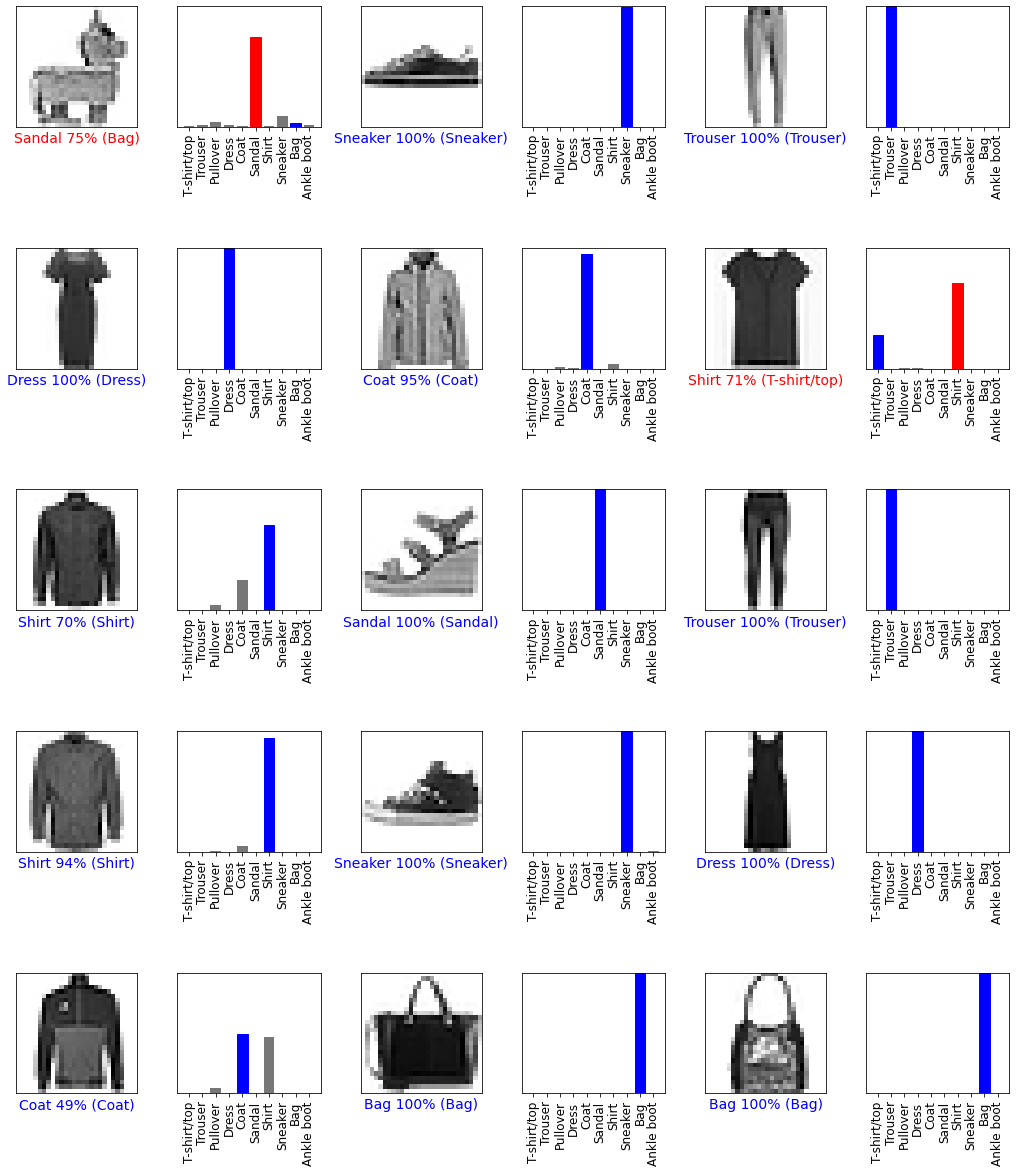

In [69]:
rnd_idx = np.random.randint(1, N_TEST//batch_size)
img_cnt = 0
for images, labels in test_dataset:
    img_cnt += 1
    if img_cnt != rnd_idx:
        continue
    predictions = model(images, training=False)
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    labels = tf.argmax(labels, axis=-1)
    plt.figure(figsize=(3*2*num_cols, 4*num_rows))
    plt.subplots_adjust(hspace=1.0)
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions.numpy(), labels.numpy())

### HDF5 format으로 전체 model 저장하기

## 연습 11. 저장 경로를 지정하라

In [70]:
# 모델을 저장할 경로를 지정한다. (save_dir_name = 'saved_models'로 지정했다는 것을 기억하라)
saved_model_path = os.path.join(cur_dir, save_dir_name, 'mnist_cnn_func.h5')

## 연습12. 모델을 저장하라.

In [71]:
# 모델을 저장한다.


In [72]:
# 제대돌 저장됐는지 확인


## 연습 13. 모델 로딩해서 평가

In [73]:
# 모델을 로딩해서 테스트셋(test_dataset)에서 평가한다.


### 다른 방법으로 모델을 저장 (saved_model format으로 저장하기(.pb))

## 연습 14. 모델 경로 지정, 저장하고 확인

In [74]:
# 모델 경로를 정해 저장하고 확인 


## 연습 15. 모델 불러서 test_dataset에서 평가

In [75]:
# 다시 모델 불러서 test_dataset에서 평가한다.



In [76]:
# -*- coding: utf-8 -*-